<a href="https://colab.research.google.com/github/rahul-727/AML-Lab3/blob/main/2348544_AML_LAB3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Perform the following using Program 3a_dataset
1. Consider duration, age, and campaign columns as predictors and the column Y as target
variable. Y says whether the client will subscribe a term deposit or not.
2. Use 70% of the data as training data set and 30% of data as testing data set.
3. Build a logistic regression model.
4. Determine the classification accuracy rate of the model on both train and test set.
5. Display Classification Report and Confusion Matrix
6. Provide suitable inference on the model created.

In [83]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [84]:
data = pd.read_csv('/content/Program_3a_Dataset.csv')
data.head(5)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [85]:
data.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [86]:
data.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

In [87]:
X = data[['duration','age', 'campaign']].values
Y = data['y'].values

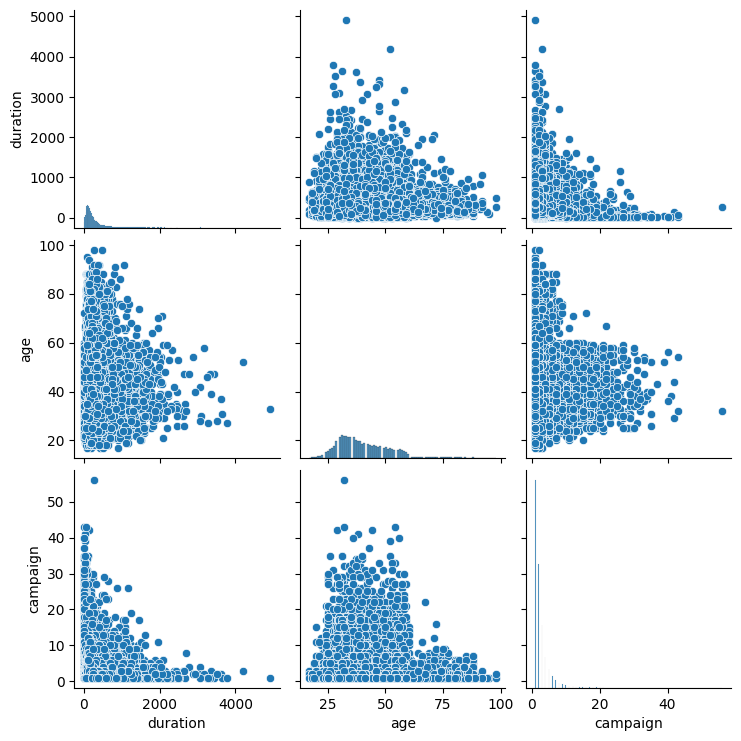

In [88]:
sns.pairplot(data[['duration', 'age', 'campaign', 'y']])
plt.show()

# Splitting the data into training and testing set

In [89]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

# Building Logistic Regression model

In [90]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train, Y_train)

LogisticRegression()

In [91]:
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

In [92]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

train_accuracy = accuracy_score(Y_train, y_train_pred)
test_accuracy = accuracy_score(Y_test, y_test_pred)

print(f'Training Accuracy: {train_accuracy:.4f}')
print(f'Testing Accuracy: {test_accuracy:.4f}')

Training Accuracy: 0.8928
Testing Accuracy: 0.8950


In [93]:
print("\nClassification Report on Testing Set:")
print(classification_report(Y_test, y_test_pred))


Classification Report on Testing Set:
              precision    recall  f1-score   support

          no       0.91      0.98      0.94     10969
         yes       0.61      0.18      0.28      1388

    accuracy                           0.89     12357
   macro avg       0.76      0.58      0.61     12357
weighted avg       0.87      0.89      0.87     12357



In [94]:
conf_matrix = confusion_matrix(Y_test, y_test_pred)
print("\nConfusion Matrix:")
print(conf_matrix)


Confusion Matrix:
[[10803   166]
 [ 1132   256]]


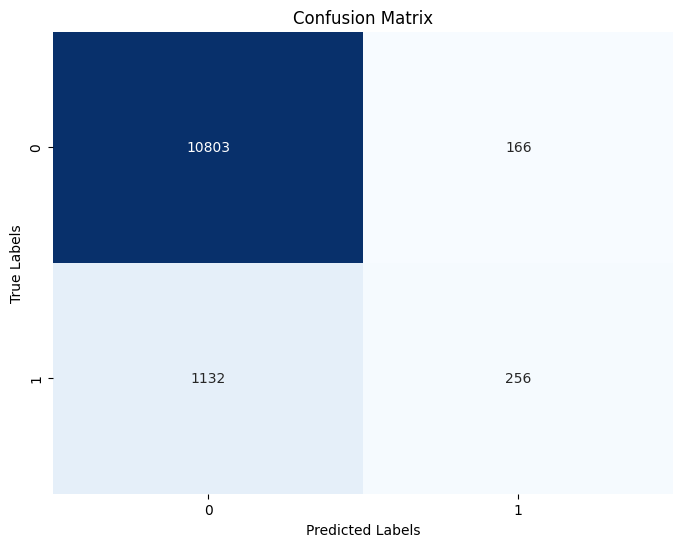

In [95]:
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

# Perform the following using Program3b_dataset
1. Consider &#39;variance&#39;, &#39;skewness&#39;, &#39;curtosis&#39;, &#39;entropy&#39; columns as predictors and the column
&#39;class&#39; as the target  variable
2. Build a logistic regression model.
3. Calculate the classification accuracy, precision and recall for the model
4. Display Classification Report and Confusion Matrix
5. Provide suitable inference on the model created.

In [96]:
df = pd.read_csv('/content/Program_3b_dataset.csv')
df.head(5)

,variance,skewness,curtosis,entropy,class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


In [97]:
Program_b_X = df[['variance','skewness', 'curtosis','entropy']].values
Program_b_Y = df['class'].values

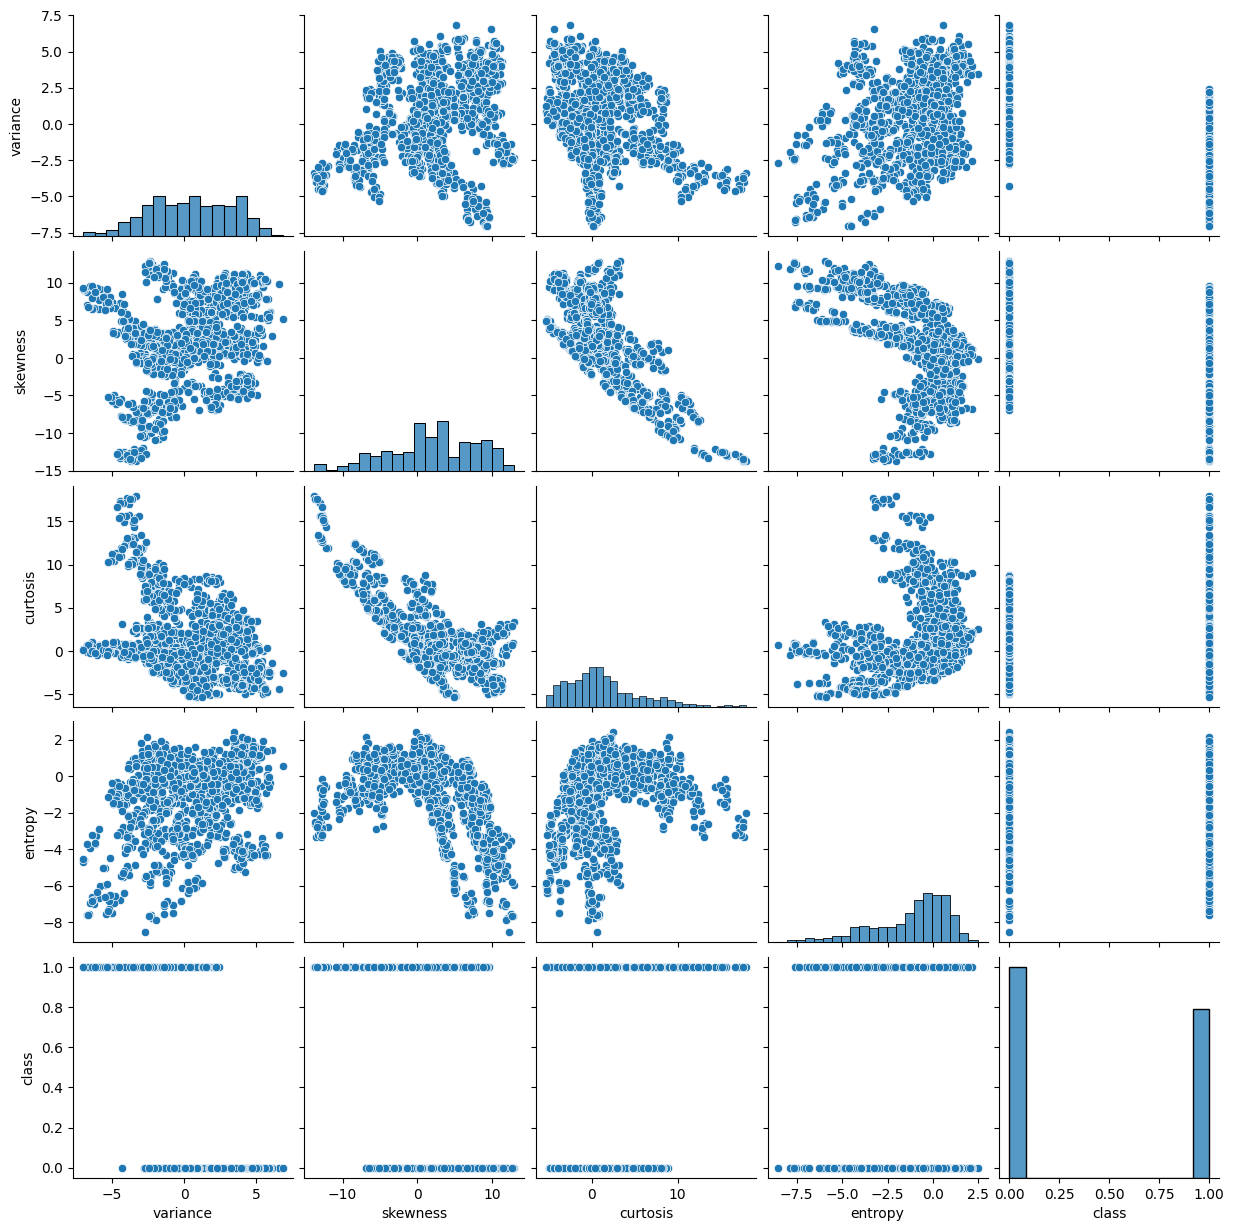

In [98]:
sns.pairplot(df[['variance','skewness', 'curtosis','entropy','class']])
plt.show()

# Splitting the data into training and testing set

In [99]:
Program_b_X_train, Program_b_X_test, Program_b_Y_train, Program_b_Y_test = train_test_split(Program_b_X, Program_b_Y, test_size=0.3, random_state=42)

# Building Logistic Regression model for the Program_b data

In [100]:
Program_b_model = LogisticRegression()
Program_b_model.fit(Program_b_X_train, Program_b_Y_train)

LogisticRegression()

In [101]:
Program_b_y_train_pred = Program_b_model.predict(Program_b_X_train)
Program_b_y_test_pred = Program_b_model.predict(Program_b_X_test)

In [102]:
Program_b_train_accuracy = accuracy_score(Program_b_Y_train, Program_b_y_train_pred)
Program_b_test_accuracy = accuracy_score(Program_b_Y_test, Program_b_y_test_pred)

print(f'Training Accuracy of Program_3b_dataset: {Program_b_train_accuracy:.4f}')
print(f'Testing Accuracy of Program_3b_dataset: {Program_b_test_accuracy:.4f}')

Training Accuracy of Program_3b_dataset: 0.9917
Testing Accuracy of Program_3b_dataset: 0.9879


In [103]:
print("\nClassification Report on Program_3b_dataset Testing Set:")
print(classification_report(Program_b_Y_test, Program_b_y_test_pred))


Classification Report on Program_3b_dataset Testing Set:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       229
           1       0.98      0.99      0.99       183

    accuracy                           0.99       412
   macro avg       0.99      0.99      0.99       412
weighted avg       0.99      0.99      0.99       412



In [104]:
Program_b_conf_matrix = confusion_matrix(Program_b_Y_test, Program_b_y_test_pred)
print("\nConfusion Matrix of Program 3b dataset:")
print(Program_b_conf_matrix)


Confusion Matrix of Program 3b dataset:
[[226   3]
 [  2 181]]


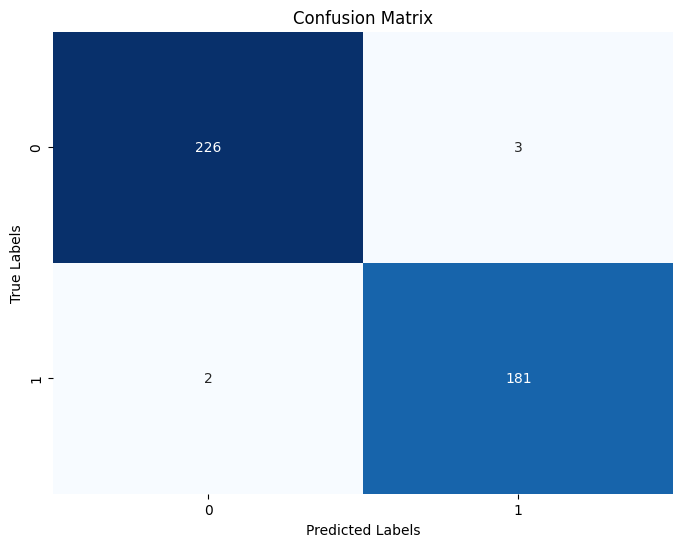

In [105]:
plt.figure(figsize=(8, 6))
sns.heatmap(Program_b_conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()